In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import datetime

In [2]:
data= pd.read_excel('voetbal.xlsx')

In [3]:
start = pd.to_datetime('2011-01-01')
end = pd.to_datetime('2011-12-31')
start_u = start.value//10**9
end_u = end.value//10**9

data['inzet'] = ''
for x, row in data.iterrows():
    y = (pd.to_datetime(np.random.randint(start_u, end_u), unit='s'))
    data.at[x,'geboortedatum'] = datetime.date(y.year,y.month,y.day)
    
    if y < pd.to_datetime('2011-04-01'):
        data.at[x, 'inzet'] = 'zeer goed'
    elif y < pd.to_datetime('2011-10-01'):
        data.at[x, 'inzet'] = 'goed'
    else:
        data.at[x, 'inzet'] = 'matig'
data.head()

,naam,naam.1,positie,aantal gemaakte goalen,geboortedatum,inzet,gewicht,lengte
0,speler1,speler1,staart,1,2011-08-24,goed,25.3,123
1,speler2,speler2,staart,0,2011-05-27,goed,29.2,134
2,speler3,speler3,linkervleugel,1,2011-05-27,goed,22.8,116
3,speler4,speler4,rechtervleugel,0,2011-09-02,goed,23.2,121
4,speler5,speler5,piloot,6,2011-11-09,matig,24.5,121


In [4]:
gewicht_gesorteerd = sorted(set(data.gewicht))

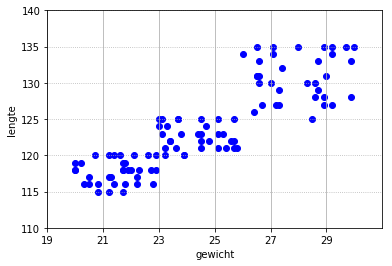

In [5]:
for x in gewicht_gesorteerd:
    y=data[data.gewicht==x]
    plt.scatter(y.gewicht, y.lengte, c='b')
plt.xlim(19,31)
plt.ylim(110,140)
plt.xlabel('gewicht')
plt.ylabel('lengte')
plt.grid(True, axis='x')
plt.grid(True, axis='y', linestyle=':')
plt.xticks(np.arange(19,31,step=2))
plt.show()

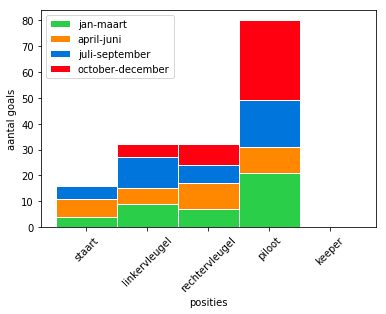

In [41]:
# Split up values by birth category
cat1= data[pd.to_datetime(data.geboortedatum) < pd.to_datetime('2011-04-01')]
cat2= data[(pd.to_datetime('2011-04-01')<=pd.to_datetime(data.geboortedatum)) & (pd.to_datetime(data.geboortedatum)< pd.to_datetime('2011-07-01'))]
cat3= data[(pd.to_datetime('2011-07-01')<=pd.to_datetime(data.geboortedatum)) & (pd.to_datetime(data.geboortedatum) < pd.to_datetime('2011-10-01'))]
cat4= data[pd.to_datetime(data.geboortedatum) >= pd.to_datetime('2011-10-01')]

# retreiving positions and initializing bars
bars1 = {}
bars2 = {}
bars3 = {}
bars4 = {}
positions = []
for position in data['positie']:
    if position not in positions:
        positions.append(position)
        bars1[position]=0
        bars2[position]=0
        bars3[position]=0
        bars4[position]=0
        

# Values of each position in all birthcategories
for x, row in cat1.iterrows():
    position=cat1.at[x, 'positie']
    bars1[position]=bars1[position]+ cat1.at[x, 'aantal gemaakte goalen']
for x, row in cat2.iterrows():
    position=cat2.at[x, 'positie']
    bars2[position]=bars2[position]+ cat2.at[x, 'aantal gemaakte goalen']
for x, row in cat3.iterrows():
    position=cat3.at[x, 'positie']
    bars3[position]=bars3[position]+ cat3.at[x, 'aantal gemaakte goalen']
for x, row in cat4.iterrows():
    position=cat4.at[x, 'positie']
    bars4[position]=bars4[position]+ cat4.at[x, 'aantal gemaakte goalen']

# Heights of bars1 + bars2 and bars1 + bars2 + bars3
bars1_2 = np.add(list(bars1.values()), list(bars2.values())).tolist()
bars1_2_3= np.add(bars1_2,list(bars3.values())).tolist()
 
# The position of the bars on the x-axis
r = range(0,len(positions))
 
# Names of group and bar width
names = positions
barWidth = 1
 
# Create green bars
plt.bar(r, list(bars1.values()), color='#2BCE48', edgecolor='white', width=barWidth)
# Create orange bars (middle no.1), on top of the firs ones
plt.bar(r, list(bars2.values()), bottom=list(bars1.values()), color='#FF8800', edgecolor='white', width=barWidth)
# Create blue bars (midlle no.2)
plt.bar(r, list(bars3.values()), bottom=bars1_2, color='#0075DC', edgecolor='white', width=barWidth)
# Create red bars (top)
plt.bar(r, list(bars4.values()), bottom=bars1_2_3, color='#FF0010', edgecolor='white', width=barWidth)
 
# Custom X axis
plt.legend(["jan-maart","april-juni","juli-september","october-december"])
plt.xticks(range(0,len(positions)),positions, rotation=45)
plt.ylabel("aantal goals")
plt.xlabel("posities")
 
# Show graphic
plt.show()